# Project 1
## Denoising EEG signals using LMS

In [23]:
!pip install -r requirements.txt

In [63]:
from pyedflib import highlevel
import matplotlib.pyplot as plt
import numpy as np

Download sample file

!curl -o recordings/n6.edf https://physionet.org/content/capslpdb/1.0.0/n6.edf

In [304]:
signals, signal_headers, header = highlevel.read_edf('recordings/n7.edf')

Imprimo información del dataset

In [30]:
print('Lista de Canales en esta base de datos: \n')
for sh in signal_headers:
  #print(sh['label'], '  \t' ,sh['prefilter'],'  \tSample Rate:',sh['sample_rate'])
  print(sh)

Lista de Canales en esta base de datos: 

{'label': 'LOC-A1', 'dimension': 'uV', 'sample_frequency': 128.0, 'physical_max': 584.4729, 'physical_min': -582.193, 'digital_max': 2047, 'digital_min': -2048, 'prefilter': '', 'transducer': ''}
{'label': 'ROC-A2', 'dimension': 'uV', 'sample_frequency': 128.0, 'physical_max': 556.5395, 'physical_min': -559.264, 'digital_max': 2047, 'digital_min': -2048, 'prefilter': '', 'transducer': ''}
{'label': 'EMG-EMG', 'dimension': 'uV', 'sample_frequency': 128.0, 'physical_max': 564.3646, 'physical_min': -566.85, 'digital_max': 2047, 'digital_min': -2048, 'prefilter': '', 'transducer': ''}
{'label': 'C3-A2', 'dimension': 'uV', 'sample_frequency': 128.0, 'physical_max': 555.9782, 'physical_min': -556.793, 'digital_max': 2047, 'digital_min': -2048, 'prefilter': '', 'transducer': ''}
{'label': 'O2-A1', 'dimension': 'uV', 'sample_frequency': 128.0, 'physical_max': 560.6849, 'physical_min': -561.232, 'digital_max': 2047, 'digital_min': -2048, 'prefilter': ''

In [302]:
print("\nNúmero de canales:", len(signals))
for i, signal in enumerate(signals):
    print(f"Canal {signal_headers[i]['label']}: {len(signal)} muestras")
    print(f"duración (segundos): {len(signal) / signal_headers[i]['sample_frequency']}")



Número de canales: 14
Canal C3-A2: 3004000 muestras
duración (segundos): 30040.0
Canal C4-P4: 3004000 muestras
duración (segundos): 30040.0
Canal EKG: 6008000 muestras
duración (segundos): 30040.0
Canal EOG-L: 3004000 muestras
duración (segundos): 30040.0
Canal EOG-R: 3004000 muestras
duración (segundos): 30040.0
Canal F4-C4: 3004000 muestras
duración (segundos): 30040.0
Canal Fp2-F4: 3004000 muestras
duración (segundos): 30040.0
Canal P4-O2: 3004000 muestras
duración (segundos): 30040.0
Canal Tib dx: 6008000 muestras
duración (segundos): 30040.0
Canal Tib sx: 6008000 muestras
duración (segundos): 30040.0
Canal abdomen: 300400 muestras
duración (segundos): 30040.0
Canal flow: 600800 muestras
duración (segundos): 30040.0
Canal milo: 6008000 muestras
duración (segundos): 30040.0
Canal thorax: 300400 muestras
duración (segundos): 30040.0


# Ver que paciente ni me conviene tomar según la señal que tenga cada uno

## Sueño REM
EOG (Electrooculograma): Presenta movimientos oculares rápidos y de gran amplitud. Verás picos y oscilaciones marcadas, a veces en ambos canales EOG (ROC-A2, LOC-A1).
EEG (Electroencefalograma): Muestra actividad de baja amplitud y alta frecuencia, similar a la vigilia. Predominan ondas theta y actividad rápida, sin ondas lentas ni complejos K.
EMG (Electromiograma): Hay atonía muscular, es decir, la señal EMG tiene muy baja amplitud (casi plana), indicando relajación muscular.

N6 - REM [s] 10640, 10700, 10820, 11060, 11090, 11210, 11420, 10820, 11090 (la mayoria por esta zona esta buena)

Las diferencias entre F3/F4 (frontales), C3/C4 (centrales) y O1/O2 (occipitales) pueden ser útiles para comparar patrones, pero para REM no hay un electrodo claramente superior; puedes usar cualquiera para ver la actividad rápida y baja amplitud.

## Etapa S3/S4 (Sueño NREM 3, sueño profundo):

EEG: Predominan ondas delta (0.5–2 Hz), de gran amplitud y baja frecuencia. La señal se ve con picos grandes y lentos.
EOG: Prácticamente no hay movimientos oculares; la señal permanece estable y sin grandes variaciones.
EMG: Tono muscular bajo, pero no tan bajo como en REM; puede haber actividad muscular residual.

N6 - S3/S4[s] 15090, 15330, 15390, 15780

Los electrodos centrales (C3, C4) suelen mostrar las ondas delta más prominentes, porque el sueño profundo se origina principalmente en regiones frontocentrales.
En tu caso, C3-A2 es ideal para observar sueño profundo.

## Vigilia
O1/O2 (occipitales):
Son más útiles para analizar actividad alfa (vigilia) y algunas transiciones, pero no son los mejores para sueño profundo.

N6 - 660, 690, 810 (hay un ruidazo en una parte que capaz estaría bueno sacar), 900, 930
Capaz buscar otro individuo que haya estado más tiempo despierto

In [314]:
start_sec= 0


Mostrando 30 segundos de señal desde el segundo 660.



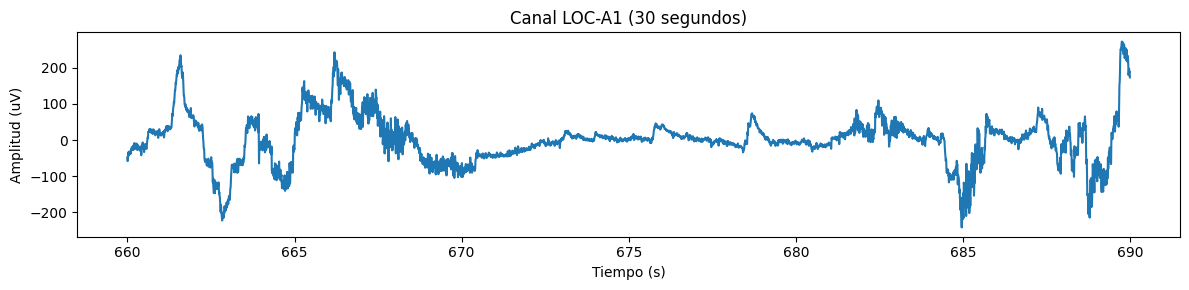

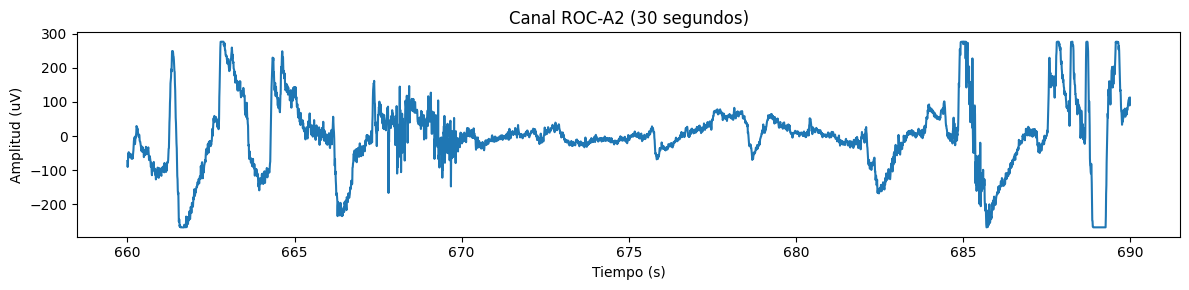

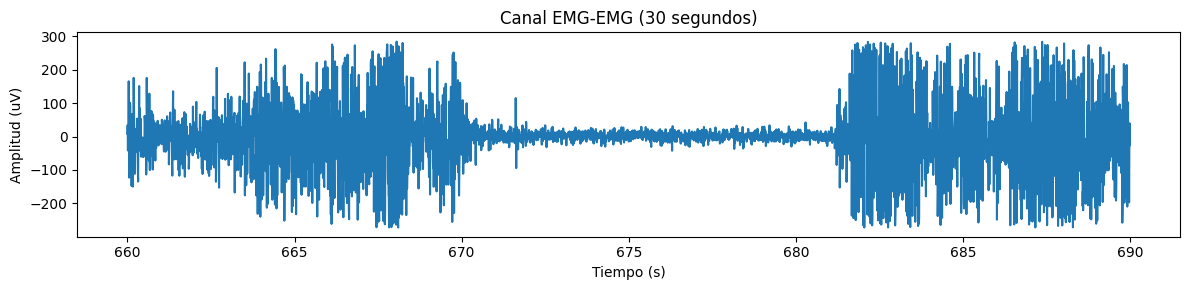

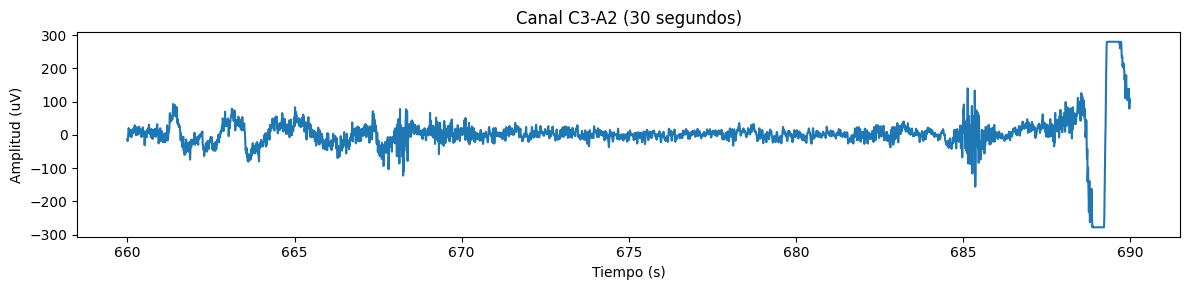

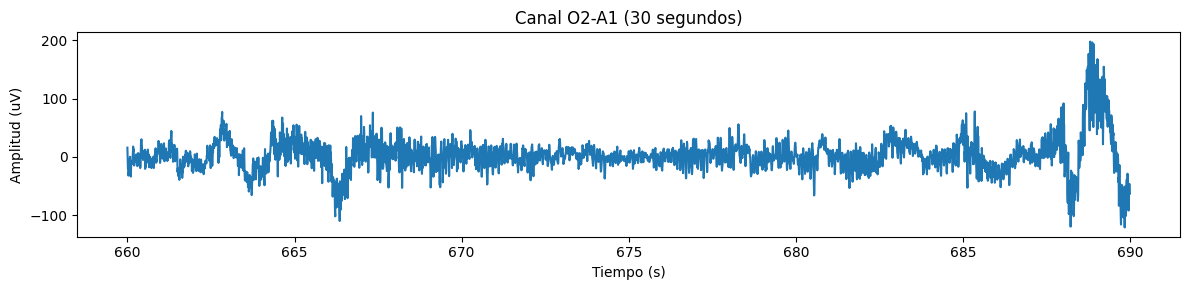

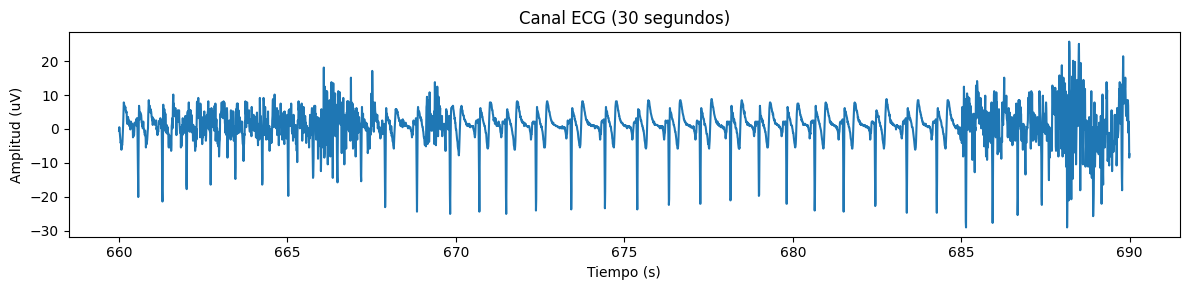

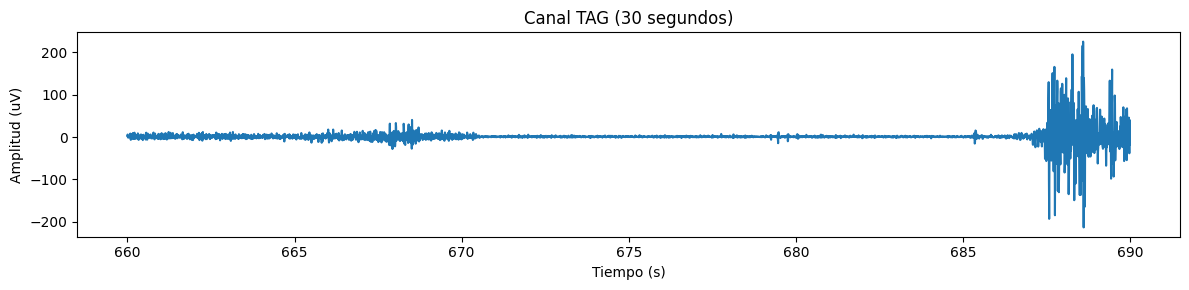

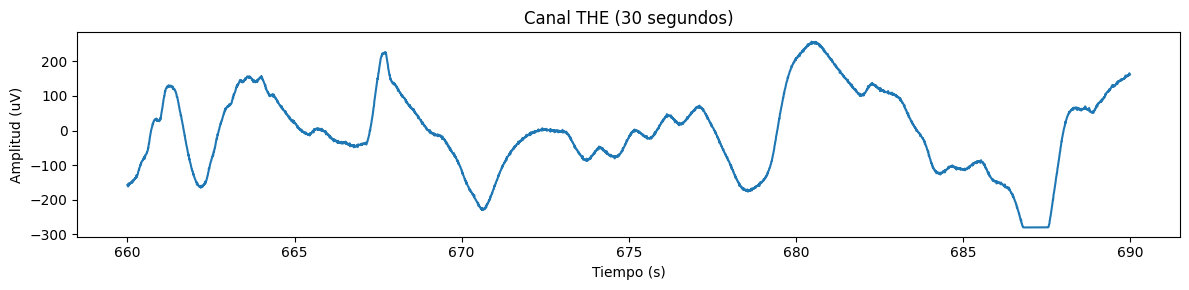

In [336]:
window_sec = 30
#start_sec = 300
#start_sec = np.random.randint(0, int(len(signals[0]) / signal_headers[0]['sample_frequency'] - window_sec))
start_sec = start_sec+ 30
print(f"\nMostrando {window_sec} segundos de señal desde el segundo {start_sec}.\n")

for i, signal in enumerate(signals):
    plt.figure(figsize=(12, 3))
    start_idx = int(start_sec * signal_headers[i]['sample_frequency'])
    end_idx = int((start_sec + window_sec) * signal_headers[i]['sample_frequency'])
    segment = signal[start_idx:end_idx]
    t = [j / signal_headers[i]['sample_frequency'] for j in range(start_idx, end_idx)]
    plt.plot(t, segment)
    plt.title(f"Canal {signal_headers[i]['label']} ({window_sec} segundos)")
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (uV)')
    plt.tight_layout()
    plt.show()